In [1]:
# Read uspto dataset
import pandas as pd
import numpy as np
import nltk


df = pd.read_csv('./dataset/df-claim-A.csv')
df_claim=df[["ID","Title","Claim","cpc_subclass"]]
df_claim= df_claim.dropna()
df_claim = df_claim.reset_index(drop=True)
df_claim.head()

,ID,Title,Claim,cpc_subclass
0,8927300,Method and compositions for the detection of p...,1. A compound of the formula: wherein R is a s...,"C07H,C07K,C12N,C12Q,G01N"
1,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N"
2,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K"
3,8925531,Spark plug degradation detection,1. A method of controlling an engine cylinder ...,"F02D,F02P,Y02T"
4,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L"


In [2]:
len(df_claim)

1428600

In [3]:
df_claim_uspto = df_claim[df_claim['cpc_subclass'].str.contains(r'\bH[\w]*|,[\s]*H[\w]*')]
df_claim_uspto.head()

,ID,Title,Claim,cpc_subclass
1,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N"
2,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K"
4,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L"
6,8928653,"Information processing system, information pro...",1. An information processing system comprising...,"A63F,G06F,H04N"
7,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,"G06F,H04L"


In [4]:
#df_claim=df_claim[["grant_id","patent_title","claims_text","abstract", "main_classification"]]
df_claim_uspto["Claim"]= df_claim_uspto["Claim"].dropna()
df_claim_uspto = df_claim_uspto.reset_index(drop=True)
df_claim_uspto.head()

C:\Users\admin\AppData\Local\Temp/ipykernel_31528/1681520836.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_claim_uspto["Claim"]= df_claim_uspto["Claim"].dropna()


,ID,Title,Claim,cpc_subclass
0,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N"
1,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K"
2,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L"
3,8928653,"Information processing system, information pro...",1. An information processing system comprising...,"A63F,G06F,H04N"
4,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,"G06F,H04L"


In [5]:
df_claim_uspto=df_claim_uspto[:60000]
df_claim_uspto.head()

,ID,Title,Claim,cpc_subclass
0,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N"
1,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K"
2,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L"
3,8928653,"Information processing system, information pro...",1. An information processing system comprising...,"A63F,G06F,H04N"
4,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,"G06F,H04L"


# preprocessing

In [6]:
def cleantext(df_claim_uspto): 
    
    df_claim_uspto['cleaned_claims_text'] = df_claim_uspto['Claim'].replace(r'\'|\"|\,|\.|\?|\+|\-|\/|\=|\(|\)|\n|"', '', regex=True)
    
    # convert to lowercase
    df_claim_uspto['cleaned_claims_text'] = df_claim_uspto['cleaned_claims_text'].str.lower()
    
    #remove numbers
    df_claim_uspto['cleaned_claims_text'] =df_claim_uspto['cleaned_claims_text'].replace(r'\d+', '', regex = True)
        
    #remove_symbols
    df_claim_uspto['cleaned_claims_text']  = df_claim_uspto['cleaned_claims_text'].replace(r'[^a-zA-Z0-9]', " ", regex=True)
    
    #remove punctuations 
    df_claim_uspto['cleaned_claims_text'] = df_claim_uspto['cleaned_claims_text'].replace(r'[[]!"#$%\'()\*+,-./:;<=>?^_`{|}]+',"", regex = True)
    
    #remove_URL(x):
    df_claim_uspto['cleaned_claims_text']  = df_claim_uspto['cleaned_claims_text'].replace(r'https.*$', "", regex = True)
    df_claim_uspto['cleaned_claims_text'] = df_claim_uspto['cleaned_claims_text'].replace("   ", " ", regex = True)
    df_claim_uspto['cleaned_claims_text'] = df_claim_uspto['cleaned_claims_text'].replace("  ", " ", regex = True)
   
    return df_claim_uspto

df_claim_uspto = cleantext(df_claim_uspto)
df_claim_uspto.head()

C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\pandas\core\dtypes\inference.py:181: FutureWarning: Possible nested set at position 1
  re.compile(obj)


,ID,Title,Claim,cpc_subclass,cleaned_claims_text
0,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N",an advertising method comprising displaying a...
1,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K",a method comprising receiving from a mobile s...
2,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L",a resistance change memory comprising a first...
3,8928653,"Information processing system, information pro...",1. An information processing system comprising...,"A63F,G06F,H04N",an information processing system comprising a...
4,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,"G06F,H04L",a computerimplemented method for transferring...


In [7]:
import nltk
from nltk.corpus import stopwords

# Load the stop words
nltk.download('stopwords')
english_stop_words = set(stopwords.words('english'))

# Define a set of patent-specific stop words
patent_stop_words = set(["invention", "apparatus", "method", "system", "device",
                         "means", "comprising", "having", "including", "wherein",
                         "according", "configured", "configured to", "configured for",
                         "one or more", "plurality", "at least", "said", "and/or",
                         "thereof", "thereto", "herein", "hereby", "hereof", "hereunder",
                         "hereto", "herewith", "respectively", "corresponding",
                         "respectively corresponding", "substantially", "generally",
                         "typically", "usually", "often", "frequently", "commonly",
                         "normally", "conventional", "traditional", "known", "prior",
                         "art", "field", "related", "disclosed", "described", "illustrated",
                         "embodiment", "example", "figure", "graph", "chart", "data",
                         "information", "section", "portion", "aspect", "aspect of",
                         "part", "feature", "detail", "particular", "certain", "some",
                         "many", "various", "multiple", "different", "differentiate",
                         "similar", "corresponding", "correspondingly", "also",
                         "in addition", "furthermore", "moreover", "additionally",
                         "especially", "particular", "particularity", "specific",
                         "specifically", "example", "exemplary", "illustrative",
                         "such as", "include", "includes", "including", "included",
                         "contain", "contains", "containing", "contained", "shown"])

# Merge the sets of stop words
stop_words = english_stop_words.union(patent_stop_words)

df_claim_uspto['cleaned_claim_text_without_Stopwprd'] = df_claim_uspto['cleaned_claims_text'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in stop_words]))
df_claim_uspto.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,ID,Title,Claim,cpc_subclass,cleaned_claims_text,cleaned_claim_text_without_Stopwprd
0,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N",an advertising method comprising displaying a...,advertising displaying television program vide...
1,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K",a method comprising receiving from a mobile s...,receiving mobile switching network carrier gat...
2,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L",a resistance change memory comprising a first...,resistance change memory first interconnect li...
3,8928653,"Information processing system, information pro...",1. An information processing system comprising...,"A63F,G06F,H04N",an information processing system comprising a...,processing first processing second processing ...
4,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,"G06F,H04L",a computerimplemented method for transferring...,computerimplemented transferring electronic de...


In [8]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])
df_claim_uspto["Lemmatized-Claim"] = df_claim_uspto["cleaned_claim_text_without_Stopwprd"].apply(lambda text: lemmatize_words(text))
df_claim_uspto.head()

,ID,Title,Claim,cpc_subclass,cleaned_claims_text,cleaned_claim_text_without_Stopwprd,Lemmatized-Claim
0,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N",an advertising method comprising displaying a...,advertising displaying television program vide...,advertising displaying television program vide...
1,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K",a method comprising receiving from a mobile s...,receiving mobile switching network carrier gat...,receiving mobile switching network carrier gat...
2,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L",a resistance change memory comprising a first...,resistance change memory first interconnect li...,resistance change memory first interconnect li...
3,8928653,"Information processing system, information pro...",1. An information processing system comprising...,"A63F,G06F,H04N",an information processing system comprising a...,processing first processing second processing ...,processing first processing second processing ...
4,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,"G06F,H04L",a computerimplemented method for transferring...,computerimplemented transferring electronic de...,computerimplemented transferring electronic de...


In [9]:
#tokenize corpus
nltk.download('punkt')

#tokenize a string into words
def tokenize_text(text):
    tokens = nltk.word_tokenize(text)
    return tokens

# Apply the tokenization function to each row of the 'Lemmatized-Claim' column
df_claim_uspto['Claim_tokens'] = df_claim_uspto["Lemmatized-Claim"].apply(tokenize_text)
df_claim_uspto.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,ID,Title,Claim,cpc_subclass,cleaned_claims_text,cleaned_claim_text_without_Stopwprd,Lemmatized-Claim,Claim_tokens
0,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N",an advertising method comprising displaying a...,advertising displaying television program vide...,advertising displaying television program vide...,"[advertising, displaying, television, program,..."
1,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K",a method comprising receiving from a mobile s...,receiving mobile switching network carrier gat...,receiving mobile switching network carrier gat...,"[receiving, mobile, switching, network, carrie..."
2,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L",a resistance change memory comprising a first...,resistance change memory first interconnect li...,resistance change memory first interconnect li...,"[resistance, change, memory, first, interconne..."
3,8928653,"Information processing system, information pro...",1. An information processing system comprising...,"A63F,G06F,H04N",an information processing system comprising a...,processing first processing second processing ...,processing first processing second processing ...,"[processing, first, processing, second, proces..."
4,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,"G06F,H04L",a computerimplemented method for transferring...,computerimplemented transferring electronic de...,computerimplemented transferring electronic de...,"[computerimplemented, transferring, electronic..."


# divide the dataset

In [10]:
#Divide the dataset into different size
df_claim_30K=df_claim_uspto[:30000]
df_claim_30K.head()

,ID,Title,Claim,cpc_subclass,cleaned_claims_text,cleaned_claim_text_without_Stopwprd,Lemmatized-Claim,Claim_tokens
0,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N",an advertising method comprising displaying a...,advertising displaying television program vide...,advertising displaying television program vide...,"[advertising, displaying, television, program,..."
1,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K",a method comprising receiving from a mobile s...,receiving mobile switching network carrier gat...,receiving mobile switching network carrier gat...,"[receiving, mobile, switching, network, carrie..."
2,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L",a resistance change memory comprising a first...,resistance change memory first interconnect li...,resistance change memory first interconnect li...,"[resistance, change, memory, first, interconne..."
3,8928653,"Information processing system, information pro...",1. An information processing system comprising...,"A63F,G06F,H04N",an information processing system comprising a...,processing first processing second processing ...,processing first processing second processing ...,"[processing, first, processing, second, proces..."
4,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,"G06F,H04L",a computerimplemented method for transferring...,computerimplemented transferring electronic de...,computerimplemented transferring electronic de...,"[computerimplemented, transferring, electronic..."


In [11]:
New_Sample = df_claim_uspto.iloc[59394:59395, :]
New_Sample

,ID,Title,Claim,cpc_subclass,cleaned_claims_text,cleaned_claim_text_without_Stopwprd,Lemmatized-Claim,Claim_tokens
59394,9083591,Communication apparatus and communication method,1. A communication apparatus for communicating...,H04L,a communication apparatus for communicating w...,communication communicating another orthogonal...,communication communicating another orthogonal...,"[communication, communicating, another, orthog..."


In [12]:
new_claim = str(New_Sample["Lemmatized-Claim"].iloc[0])
new_claim

'communication communicating another orthogonal frequencydivision multiplexing wireless communication communication modulator modulates input signal using predetermined modulation scheme assigns modulated input signal subcarriers frequency component orthogonal thereby generating subcarrier modulation signal inserter insert transmissionside series signal synthesis way element signal synthesis element transmissionside series alternately positioned thereby generating first signal synthesis generated multiplying subcarrier modulation signal predetermined signal amplitude coefficient transmissionside series generated multiplying series set whose quantity equal number subcarriers autocorrelation property autocorrelation value series whose shifted higher autocorrelation value series whose shifted predetermined series amplitude coefficient first transformer performs inverse fast fourier transformation first separator separate operation result first transformer first half second half element eq

# NMF on 30k patent

In [13]:
import pandas as pd
from gensim.models import Phrases
from gensim.corpora import Dictionary
from gensim.models import TfidfModel
from gensim.models.nmf import Nmf
from gensim.models.coherencemodel import CoherenceModel

# Tokenize the abstracts
docs = [doc.split() for doc in df_claim_30K['Lemmatized-Claim']]

# Apply n-gram (1,3)
bigram_phrases = Phrases(docs, min_count=10)
trigram_phrases = Phrases(bigram_phrases[docs], min_count=10)
#quadgram_phraser = Phrases(trigram_phrases[bigram_phrases[docs]])
docs = [trigram_phrases[bigram_phrases[doc]] for doc in docs]

# Create the dictionary and document-term matrix
id2word = Dictionary(docs)
id2word.filter_extremes(no_below=10, no_above=0.4)
corpus = [id2word.doc2bow(doc) for doc in docs]

# Compute tf-idf scores
tfidf = TfidfModel(corpus)
tfidf_corpus = tfidf[corpus]

# Train the NMF model
num_topics = 60
nmf_model = Nmf(tfidf_corpus, num_topics=num_topics, random_state=42)

# Transform the corpus to get the topic distribution for each document
nmf_output = nmf_model[tfidf_corpus]

# Calculate coherence metrics
cm_cv = CoherenceModel(model=nmf_model, corpus=tfidf_corpus, texts=docs, dictionary=id2word, coherence='c_v')
coherence_cv = cm_cv.get_coherence()

cm_npmi = CoherenceModel(model=nmf_model, texts=docs, corpus=tfidf_corpus, dictionary=id2word, coherence='c_npmi')
coherence_npmi = cm_npmi.get_coherence()

cm_umass = CoherenceModel(model=nmf_model, corpus=tfidf_corpus, dictionary=id2word, coherence='u_mass')
coherence_umass = cm_umass.get_coherence()

# Print the coherence scores
print('C_v coherence:', coherence_cv)
print('c_npmi coherence:', coherence_npmi)
print('u_mass coherence:', coherence_umass)

C_v coherence: 0.4600950558320819
c_npmi coherence: 0.009353560994548659
u_mass coherence: -4.3313751520747505


In [14]:
for i in range(num_topics):
    print(f"Topic {i}:")
    topic_words = [id2word[int(word_id)] for word_id, _ in nmf_model.show_topic(i, topn=10)]
    print(topic_words)

Topic 0:
['cell', 'program', 'measurement', 'ue', 'switching', 'picture', 'least_one', 'area', 'neighbor_cell', 'handover']
Topic 1:
['set', 'object', 'carrier', 'symbol', 'transmission', 'bit', 'electrical', 'broadcast', 'transmitting', 'laser']
Topic 2:
['symbol', 'opening', 'shaft', 'end', 'coil', 'motor', 'rotor', 'pad', 'stator', 'point']
Topic 3:
['audio', 'signal', 'sound', 'microphone', 'speaker', 'processing', 'digital', 'interface', 'playback', 'voice']
Topic 4:
['wireless', 'electronic', 'computer', 'member', 'device', 'wireless_communication', 'step', 'groove', 'assembly', 'external']
Topic 5:
['unit', 'display', 'control', 'processing', 'detection', 'setting', 'driving', 'predetermined', 'photoelectric_conversion', 'operation']
Topic 6:
['communication', 'message', 'protocol', 'address', 'request', 'recipient', 'response', 'receiving', 'call', 'identifier']
Topic 7:
['user', 'frequency', 'sample', 'material', 'input', 'bit', 'contact', 'authentication', 'codeword', 'associ

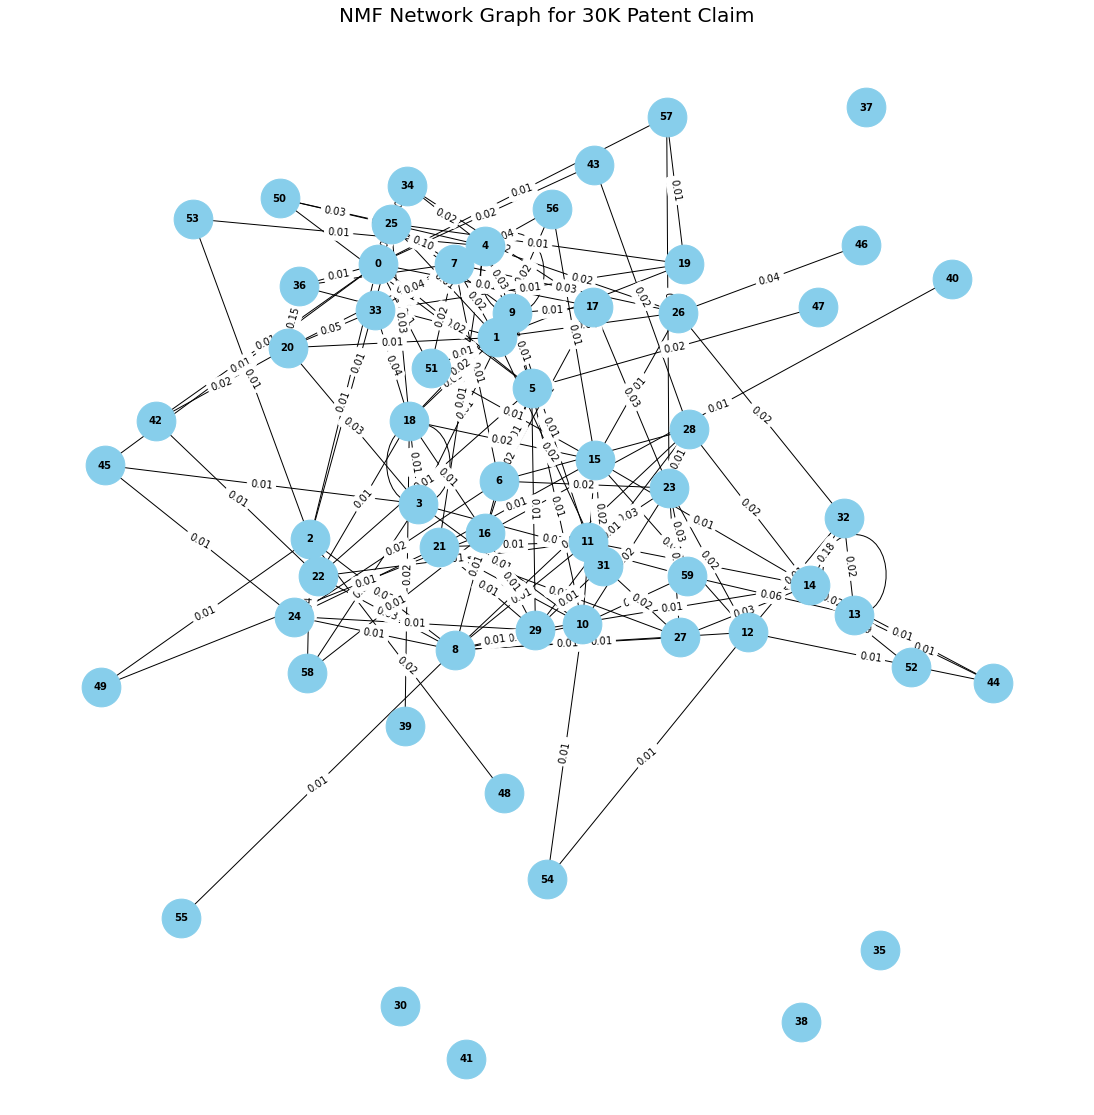

In [19]:
import networkx as nx
from collections import Counter
import matplotlib.pyplot as plt

# Get all the topic words
all_topic_words = " ".join([word for topic in nmf_model.show_topics(num_topics=60, formatted=False) for word, _ in topic[1]])

# Create a list of the most frequent words
most_frequent_words = [word for word, count in Counter(all_topic_words.split()).most_common(30)]

# Create an empty graph object
G = nx.Graph()

# Add the nodes (topics) to the graph
for i in range(60):
    G.add_node(i)

# Add the edges (terms) to the graph
for i in range(60):
    topic_words = nmf_model.show_topic(i, topn=10)
    for word, prob in topic_words:
        if word in most_frequent_words:
            j = most_frequent_words.index(word)
            G.add_edge(i, j, weight=prob)

# Draw the graph
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color="skyblue", node_size=1500, font_size=10, font_weight="bold")
nx.draw_networkx_edge_labels(G, pos, edge_labels={(i, j): "{:.2f}".format(d["weight"]) for i, j, d in G.edges(data=True)})
plt.gcf().set_size_inches(15, 15)
plt.title("NMF Network Graph for 30K Patent Claim",fontsize=20)
plt.show()

In [16]:
#prediction

In [17]:
#query_tokens = quadgram_phraser[trigram_phrases[bigram_phrases[new_Abstract.split()]]]
query_tokens = trigram_phrases[bigram_phrases[new_claim.split()]]
query_bow = id2word.doc2bow(query_tokens)

# Get the topic distribution for the query
query_tfidf = tfidf[query_bow]
query_topic_dist = nmf_model[query_tfidf]

# Get the top 3 topics for the query
top_topics = sorted(query_topic_dist, key=lambda x: x[1], reverse=True)[:3]

# Print the top 3 topics with words and probabilities
for topic_id, topic_prob in top_topics:
    print(f"Topic {topic_id} (probability: {topic_prob:.2f})")

Topic 36 (probability: 0.26)
Topic 53 (probability: 0.19)
Topic 33 (probability: 0.17)


In [18]:
num_topics=(36,53,33)
for i in (num_topics):
    print(f"Topic {i}:")
    topic_words = [id2word[int(word_id)] for word_id, _ in nmf_model.show_topic(i, topn=10)]
    print(topic_words)

Topic 36:
['signal', 'input', 'output', 'delay', 'control', 'generate', 'circuit', 'analog', 'receive', 'feedback']
Topic 53:
['element', 'application', 'flow', 'resource', 'least_one', 'antenna', 'array', 'lens', 'domain', 'display']
Topic 33:
['frequency', 'signal', 'transmission', 'output', 'terminal', 'scan', 'unit', 'reception', 'optical', 'transmitting']
